<a href="https://www.kaggle.com/code/vijays140291/credit-card-fraud?scriptVersionId=195117894" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV



In [3]:
#loading the dataset
df=pd.read_csv('/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv')
#showing the dataset
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [4]:
#getting the preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Data Preprocessing

In [5]:
df=df.drop(df.columns[[0,2]],axis=1)

df

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [6]:
df['Hour']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[2].split(' ')[1].split(':')[0]).astype(int)
df['Minute']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[2].split(' ')[1].split(':')[1]).astype(int)
df['Second']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[2].split(' ')[1].split(':')[2]).astype(int)
df['Day']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[2].split(' ')[0]).astype(int)
df['Year']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[0]).astype(int)
df['Month']=df['trans_date_trans_time'].apply(lambda x:x.split('-')[1]).astype(int)
df=df.drop('trans_date_trans_time',axis=1)

In [7]:
df.drop(['first','last','trans_num'],axis=1,inplace=True)

In [8]:
df

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,merch_zipcode,Hour,Minute,Second,Day,Year,Month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,28705.0,0,0,18,1,2019,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,NaN,0,0,44,1,2019,1
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,83236.0,0,0,51,1,2019,1
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,NaN,0,1,16,1,2019,1
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,22844.0,0,3,6,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,...,36.841266,-111.690765,0,NaN,12,12,8,21,2020,6
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,...,38.906881,-78.246528,0,22630.0,12,12,19,21,2020,6
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,...,33.619513,-105.130529,0,88351.0,12,12,32,21,2020,6
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,...,42.788940,-103.241160,0,69367.0,12,13,36,21,2020,6


In [9]:
label=LabelEncoder()
df['merchant']=label.fit_transform(df['merchant'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'fraud_Abbott-Rogahn': 0, 'fraud_Abbott-Steuber': 1, 'fraud_Abernathy and Sons': 2, 'fraud_Abshire PLC': 3, 'fraud_Adams, Kovacek and Kuhlman': 4, 'fraud_Adams-Barrows': 5, 'fraud_Altenwerth, Cartwright and Koss': 6, 'fraud_Altenwerth-Kilback': 7, 'fraud_Ankunding LLC': 8, 'fraud_Ankunding-Carroll': 9, 'fraud_Armstrong, Walter and Gottlieb': 10, 'fraud_Auer LLC': 11, 'fraud_Auer-Mosciski': 12, 'fraud_Auer-West': 13, 'fraud_Bahringer Group': 14, 'fraud_Bahringer, Bergnaum and Quitzon': 15, 'fraud_Bahringer, Osinski and Block': 16, 'fraud_Bahringer, Schoen and Corkery': 17, 'fraud_Bahringer-Larson': 18, 'fraud_Bahringer-Streich': 19, 'fraud_Bailey-Morar': 20, 'fraud_Balistreri-Nader': 21, 'fraud_Barrows PLC': 22, 'fraud_Bartoletti and Sons': 23, 'fraud_Bartoletti-Wunsch': 24, 'fraud_Barton Inc': 25, 'fraud_Barton LLC': 26, 'fraud_Bashirian Group': 27, 'fraud_Bauch-Blanda': 28, 'fraud_Bauch-Raynor': 29, 'fraud_Baumbach Ltd': 30, 'fraud_Baumbach, Feeney and Morar': 31, 'fraud_Baumbach, Ho

In [10]:
label=LabelEncoder()
df['category']=label.fit_transform(df['category'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'entertainment': 0, 'food_dining': 1, 'gas_transport': 2, 'grocery_net': 3, 'grocery_pos': 4, 'health_fitness': 5, 'home': 6, 'kids_pets': 7, 'misc_net': 8, 'misc_pos': 9, 'personal_care': 10, 'shopping_net': 11, 'shopping_pos': 12, 'travel': 13}


In [11]:

label=LabelEncoder()
df['job']=label.fit_transform(df['job'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'Academic librarian': 0, 'Accountant, chartered': 1, 'Accountant, chartered certified': 2, 'Accountant, chartered public finance': 3, 'Accounting technician': 4, 'Acupuncturist': 5, 'Administrator': 6, 'Administrator, arts': 7, 'Administrator, charities/voluntary organisations': 8, 'Administrator, education': 9, 'Administrator, local government': 10, 'Advertising account executive': 11, 'Advertising account planner': 12, 'Advertising copywriter': 13, 'Advice worker': 14, 'Aeronautical engineer': 15, 'Agricultural consultant': 16, 'Aid worker': 17, 'Air broker': 18, 'Air cabin crew': 19, 'Air traffic controller': 20, 'Airline pilot': 21, 'Ambulance person': 22, 'Amenity horticulturist': 23, 'Analytical chemist': 24, 'Animal nutritionist': 25, 'Animal technologist': 26, 'Animator': 27, 'Applications developer': 28, 'Arboriculturist': 29, 'Archaeologist': 30, 'Architect': 31, 'Architectural technologist': 32, 'Archivist': 33, 'Armed forces logistics/support/administrative officer': 34, '

In [12]:
label=LabelEncoder()
df['state']=label.fit_transform(df['state'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}


In [13]:
label=LabelEncoder()
df['gender']=label.fit_transform(df['gender'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'F': 0, 'M': 1}


In [14]:
df

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,merch_zipcode,Hour,Minute,Second,Day,Year,Month
0,514,8,4.97,0,561 Perry Cove,Moravian Falls,27,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,28705.0,0,0,18,1,2019,1
1,241,4,107.23,0,43039 Riley Greens Suite 393,Orient,47,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,NaN,0,0,44,1,2019,1
2,390,0,220.11,1,594 White Dale Suite 530,Malad City,13,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,83236.0,0,0,51,1,2019,1
3,360,2,45.00,1,9443 Cynthia Court Apt. 038,Boulder,26,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,NaN,0,1,16,1,2019,1
4,297,9,41.96,1,408 Bradley Rest,Doe Hill,45,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,22844.0,0,3,6,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,162 Jessica Row Apt. 072,Hatch,44,84735,37.7175,-112.4777,...,36.841266,-111.690765,0,NaN,12,12,8,21,2020,6
1296671,2,1,51.70,1,8617 Holmes Terrace Suite 651,Tuscarora,20,21790,39.2667,-77.5101,...,38.906881,-78.246528,0,22630.0,12,12,19,21,2020,6
1296672,599,1,105.93,1,1632 Cohen Drive Suite 639,High Rolls Mountain Park,32,88325,32.9396,-105.8189,...,33.619513,-105.130529,0,88351.0,12,12,32,21,2020,6
1296673,509,1,74.90,1,42933 Ryan Underpass,Manderson,41,57756,43.3526,-102.5411,...,42.788940,-103.241160,0,69367.0,12,13,36,21,2020,6


In [15]:
label=LabelEncoder()
df['city']=label.fit_transform(df['city'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'Achille': 0, 'Acworth': 1, 'Adams': 2, 'Afton': 3, 'Akron': 4, 'Albany': 5, 'Albuquerque': 6, 'Alder': 7, 'Aledo': 8, 'Alexandria': 9, 'Allenhurst': 10, 'Allentown': 11, 'Alpharetta': 12, 'Altair': 13, 'Alton': 14, 'Altona': 15, 'Altonah': 16, 'Alva': 17, 'Amanda': 18, 'American Fork': 19, 'Amorita': 20, 'Amsterdam': 21, 'Andrews': 22, 'Angwin': 23, 'Annapolis': 24, 'Apison': 25, 'Arcadia': 26, 'Arlington': 27, 'Armagh': 28, 'Armonk': 29, 'Arnold': 30, 'Arvada': 31, 'Ash Flat': 32, 'Ashfield': 33, 'Ashford': 34, 'Ashland': 35, 'Atglen': 36, 'Athena': 37, 'Atlantic': 38, 'Auburn': 39, 'Aurora': 40, 'Avera': 41, 'Avoca': 42, 'Azusa': 43, 'Bagley': 44, 'Bailey': 45, 'Ballwin': 46, 'Barnard': 47, 'Barneveld': 48, 'Barnstable': 49, 'Baroda': 50, 'Basye': 51, 'Baton Rouge': 52, 'Battle Creek': 53, 'Bauxite': 54, 'Bay City': 55, 'Bay Minette': 56, 'Beacon': 57, 'Beasley': 58, 'Beaver Falls': 59, 'Beaverdam': 60, 'Belfast': 61, 'Belgrade': 62, 'Belle Fourche': 63, 'Bellmore': 64, 'Belmond': 

In [16]:
df['dob_year']=df['dob'].apply(lambda x:x.split('-')[0]).astype(int)
df['dob_month']=df['dob'].apply(lambda x:x.split('-')[1]).astype(int)
df['dob_day']=df['dob'].apply(lambda x:x.split('-')[2]).astype(int)

In [17]:
df=df.drop('dob',axis=1)

In [18]:
label=LabelEncoder()
df['street']=label.fit_transform(df['street'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))

print(label_dict)

{'000 Jennifer Mills': 0, '0005 Morrison Land': 1, '00315 Ashley Valleys': 2, '00378 Sarah Burgs Suite 106': 3, '0043 Henry Plaza': 4, '005 Cody Estates': 5, '0069 Robin Brooks Apt. 695': 6, '00821 Joanna Meadow': 7, '010 Salazar Walk': 8, '010 Weaver Land': 9, '0107 Clements Point': 10, '0110 Ashley Forest': 11, '01479 Murray Circle': 12, '01505 Amy Stravenue': 13, '0157 Samuel Mission Suite 379': 14, '01770 Kevin Lodge Suite 190': 15, '0182 Owens Burgs Suite 480': 16, '0189 Emily Prairie': 17, '01892 Patricia Vista Apt. 828': 18, '019 Kimberly Light Apt. 039': 19, '02018 Gary Key Apt. 911': 20, '0207 Griffith Plains Apt. 544': 21, '02110 Lucas Freeway Suite 517': 22, '022 Moore Island': 23, '024 Williams Parkway': 24, '025 White Fork Apt. 633': 25, '030 Seth Divide Suite 355': 26, '03030 White Lakes': 27, '03090 Fisher Forges Apt. 200': 28, '033 Tara Brook Suite 523': 29, '03368 Michelle Trail': 30, '034 Kimberly Mountains': 31, '03512 Jackson Ports': 32, '0356 Sarah Light': 33, '036

In [19]:
len(df['merch_zipcode'].unique())

28337

In [20]:
df=df.drop('merch_zipcode',axis=1)

In [21]:
y=df['is_fraud']
x=df.drop('is_fraud',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

# Training the Model

In [22]:
x.isna().sum()

merchant      0
category      0
amt           0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
Hour          0
Minute        0
Second        0
Day           0
Year          0
Month         0
dob_year      0
dob_month     0
dob_day       0
dtype: int64

In [24]:
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [25]:
print(model.score(x_test,y_test))

0.998177391948134


In [27]:
y_pred=model.predict(x_test)

In [ ]:
df['is_fraud'].value_counts()

In [28]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[386733    692]
 [    17   1561]]


# Confusion Matrix

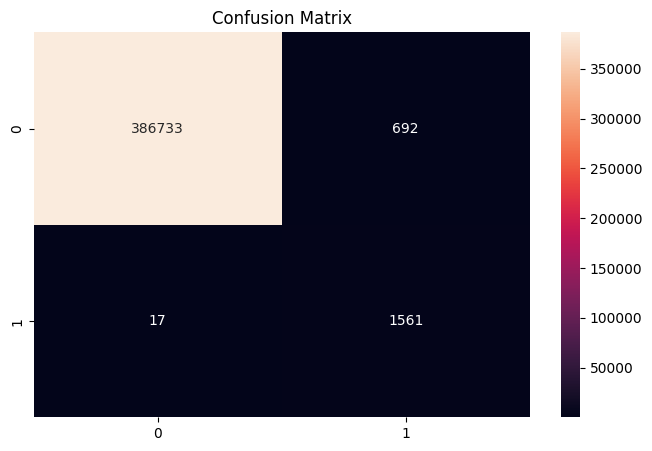

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387425
           1       0.69      0.99      0.81      1578

    accuracy                           1.00    389003
   macro avg       0.85      0.99      0.91    389003
weighted avg       1.00      1.00      1.00    389003



In [ ]:
#.70 0.98 0.82